In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [5]:
Zoo_df = pd.read_csv("Zoo.csv")
print(Zoo_df.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [6]:
print(Zoo_df.tail())

    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
96         1     1  
97         0     6  
98         1     1  
99         0  

In [7]:
Zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Zoo_df['animal name'] = le.fit_transform(Zoo_df['animal name'])

In [23]:
Zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int64
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int64(18)
memory usage: 14.3 KB


In [8]:
Zoo_df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [9]:
Zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Data Visualizations

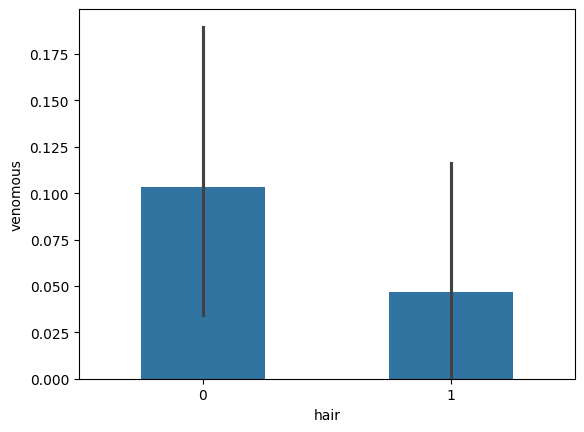

In [10]:
sns.barplot(x="hair",y='venomous', data=Zoo_df,width=0.5)

plt.show()

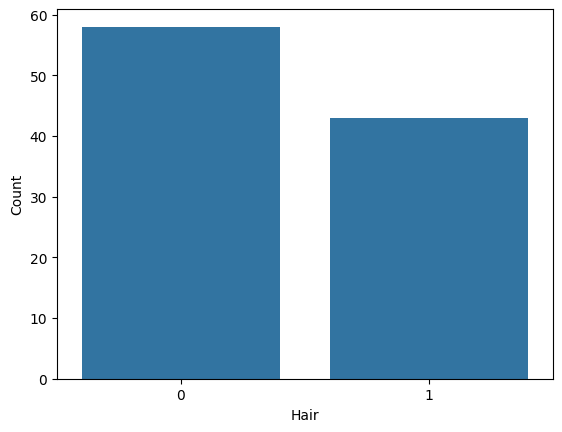

In [11]:
sns.countplot(x="hair", data=Zoo_df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()

In [24]:
cor = Zoo_df.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,1.000000,-0.109112,0.058483,0.113466,-0.138181,0.048277,0.023475,-0.027931,-0.130423,-0.058669,0.080751,0.169083,-0.037985,-0.087070,0.092462,-0.206519,-0.027243,0.080012
hair,-0.109112,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,0.058483,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,0.113466,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,-0.138181,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,0.048277,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,0.023475,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.027931,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,-0.130423,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,-0.058669,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845


Preprocess the data

In [29]:
color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in Zoo_df.hair]

In [30]:
unique_list = list(set(color_list))
unique_list

['red', 'blue']

Split the dataset

In [31]:
x = Zoo_df.iloc[:,1:17]
y = Zoo_df.iloc[:,17]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

KNN Model

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = Zoo_df.loc[:,Zoo_df.columns != 'hair'], Zoo_df.loc[:,'hair']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


In [34]:
knn = KNeighborsClassifier(n_neighbors =3)
x,y = Zoo_df.loc[:,Zoo_df.columns != 'hair'], Zoo_df.loc[:,'hair']
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.9523809523809523


Finding Appropriate Value of K

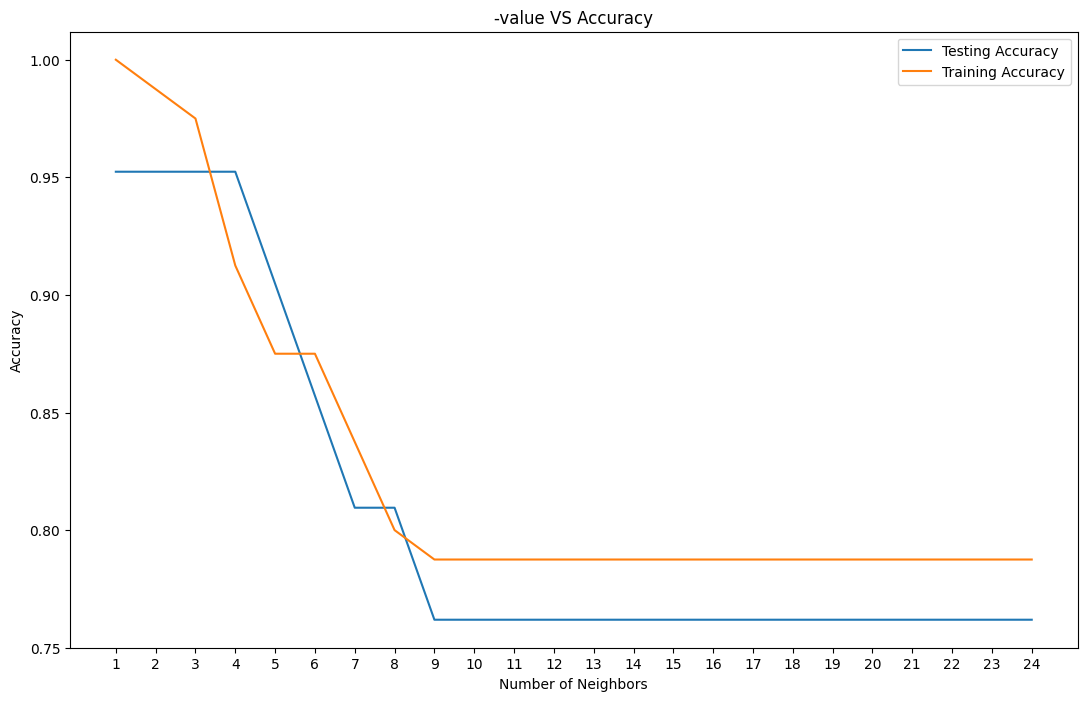

Best accuracy is 0.9523809523809523 with K = 1


In [35]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [36]:
y_pred = prediction

# Evaluate the classifier's performance

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Accuracy

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
knn.fit(x_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(x_test)

In [40]:
scores = []
cv_scores = []

In [41]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [42]:
score_knn=cross_val_score(knn, x,y, cv=10)

In [43]:
score_knn.mean()

0.5336363636363636

In [44]:
score_knn.std()*2

0.32697461169671094

In [45]:
cv_score = score_knn.mean()

In [46]:
cv_scores.append(cv_score)

In [47]:
cv_scores

[0.5336363636363636]

F1 Score

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8888888888888888


SMOTE

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.84      0.94      0.89        17

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31

